In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Calibration plot

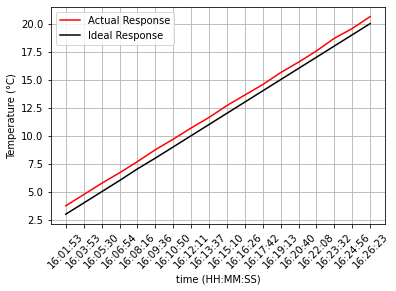

In [2]:
my_sensor = [3.75,4.75,5.75,6.69,7.69,8.75,9.69,10.69,11.63,12.69,13.63,14.56,
             15.63,16.56,17.56,18.69,19.56,20.63]
calibration = [3,4,5,6,7.04,8,9,10,11,12,13,14,15,16,17,18,19,20]
time = ['16:01:53','16:03:53','16:05:30','16:06:54',
'16:08:16','16:09:36','16:10:50','16:12:11',
'16:13:37','16:15:10','16:16:26','16:17:42',
'16:19:13','16:20:40','16:22:08','16:23:32',
'16:24:56','16:26:23']

plt.xticks(rotation=45)

plt.plot(time ,my_sensor,c = 'red', label = 'Actual Response')
plt.plot(time,calibration,c = 'k', 
            label= 'Ideal Response')
plt.ylabel('Temperature (°C)')
plt.xlabel('time (HH:MM:SS)')
plt.legend()
plt.grid()


0.6588888888888887


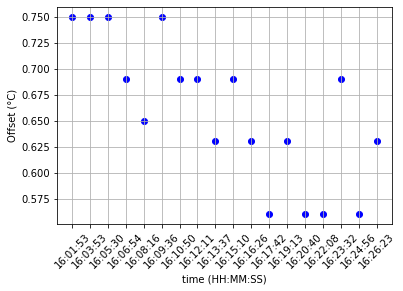

In [3]:
offset=[]
for i, j in zip(my_sensor,calibration):
 
    offset.append(i - j)

print(sum(offset)/len(offset))
plt.scatter(time,offset,c = 'b')
plt.xticks(rotation=45)
plt.xlabel('time (HH:MM:SS)')
plt.ylabel('Offset (°C)')
plt.grid()

#### Spot vs. average measurement plot

In [4]:
df = pd.read_csv('TSENSOR_DF.LOG')
df['timestamp'] = pd.to_datetime(df['# timestamp'],
            format='%Y-%m-%dT%H:%M:%SZ')

In [5]:
# mean_temp.txt is the output file from the c++ code
# it contains the averaged temperatures 
avgCpp=pd.read_csv('mean_temp.txt',header = None)

# extend list to match spot measurements in plot
avgResult_extendedcpp = []
for j in avgCpp.to_numpy():
    avgResult_extendedcpp.extend([j,j,j,j,j,j,j
                                  ,j,j,j,j,j,j,j
                                  ,j,j,j,j,j,j,j
                                  ,j,j,j,j,j,j,j
                                  ,j,j,j,j,j,j,j
                                  ,j,j,j,j,j])
df['averagecpp'] = avgResult_extendedcpp

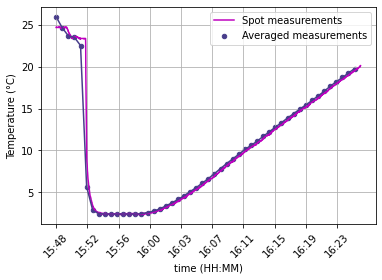

In [6]:
tick_locations = df['timestamp'][::205] 
tick_labels = df['timestamp'].dt.strftime('%H:%M')[::205] 
plt.xticks(tick_locations, tick_labels,rotation=45)

# here we subtract 0.658 °C to calibrate the sensor
plt.plot(df['timestamp'],df[' 76f96f013c'] - 0.658,c = 'm',
        label = 'Spot measurements')

plt.plot(df['timestamp'][::40],df['averagecpp'][::40] - 0.658,c='darkslateblue')

plt.scatter(df['timestamp'][::40],df['averagecpp'][::40] - 0.658,c='darkslateblue'
            , label = 'Averaged measurements',s=20)

plt.xlabel('time (HH:MM)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()

#### Sensor comparison plot

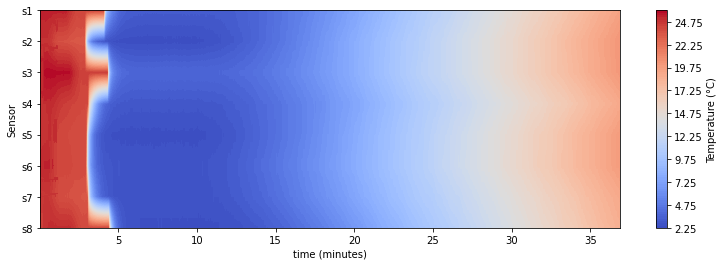

In [7]:
all_sensors = pd.read_csv('all_sensors.csv')

s = ['s8','s7','s6','s5','s4','s3','s2','s1']
temps = all_sensors.iloc[:,2:11]

plt.figure(figsize=(13,4))
contour = plt.contourf(all_sensors['millis']*1.666667*(10**-5) ,s,temps.T[::-1]
                       , cmap='coolwarm', levels=100)
cbar = plt.colorbar(contour, label='Temperature (°C)')
plt.xlabel('time (minutes)')
plt.ylabel('Sensor')
plt.yticks(np.arange(len(s)), s)
plt.show()